In [1]:
%matplotlib inline

In [2]:
pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 6.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-9 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = model.to(device)

In [5]:
imgs = ['https://ultralytics.com/images/zidane.jpg']

In [6]:
# Inference
results = model(imgs)

WARNING ⚠️ NMS time limit 0.550s exceeded


In [7]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 450.3ms pre-process, 125.6ms inference, 754.5ms NMS per image at shape (1, 3, 384, 640)


In [8]:
results.xyxy[0]

tensor([[7.43258e+02, 4.82912e+01, 1.14173e+03, 7.20000e+02, 8.79952e-01, 0.00000e+00],
        [4.41981e+02, 4.37335e+02, 4.96585e+02, 7.10051e+02, 6.74918e-01, 2.70000e+01],
        [1.23041e+02, 1.93231e+02, 7.14764e+02, 7.19746e+02, 6.65393e-01, 0.00000e+00],
        [9.78990e+02, 3.13589e+02, 1.02531e+03, 4.15532e+02, 2.61339e-01, 2.70000e+01]], device='cuda:0')

In [9]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,743.257935,48.291199,1141.734985,720.000000,0.879952,0,person
1,441.981232,437.334747,496.585175,710.051270,0.674918,27,tie
2,123.040894,193.230591,714.763611,719.745728,0.665393,0,person
3,978.990479,313.588623,1025.306885,415.531555,0.261339,27,tie


In [20]:
imgs = ['/content/dog-1407425.jpg']
results = model(imgs)
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,333.114716,398.326813,771.949341,910.923218,0.875617,16,dog
1,112.472046,146.408493,406.792694,870.643738,0.834639,0,person


In [11]:
boxes = []
for row in results.pandas().xyxy[0].itertuples():
    x, y, w, h = row[1], row[2], row[3], row[4]
    boxes.append((x, y, w, h))

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

def draw_box_on_image(image_path, box_coords):
    """
    Draws a box on an image and displays it.

    :param image_path: Path to the image file.
    :param box_coords: List of tuples (x, y, width, height) for each box.
    """
    # Open the image
    image = Image.open(image_path)

    # Create a Matplotlib figure and axis
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Add boxes to the image
    for (x, y, width, height) in box_coords:
        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    print("Showing Image")
    # Show the image with the boxes
    plt.show()
    return


Showing Image


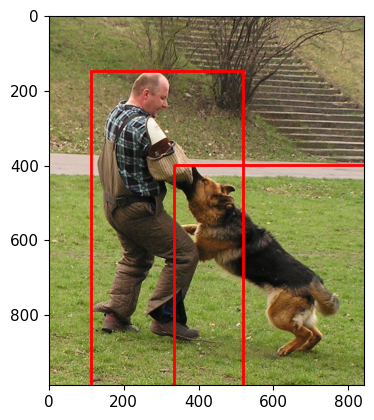

In [18]:
image_path = '/content/dog-1407425.jpg'
draw_box_on_image(image_path, boxes)